# Домашнее задание к лекции «Корреляция и корреляционный анализ»

### Задача 1 - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

* Построить точечный график
* Рассчитать коэффициенты корреляции Пирсона и Спирмена
* Построить модель линейной регрессии
* Рассчитать коэффициент детерминации
* Вывести график остатков

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('water.csv')
df

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


In [3]:
df.drop(df.columns[[0]], axis='columns', inplace = True)
df

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81


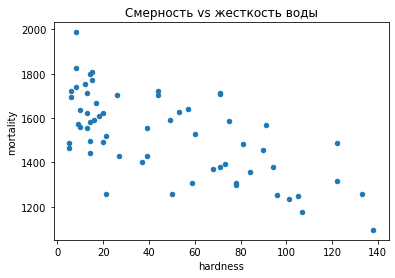

In [5]:
# Построить точечный график
df.plot(kind='scatter', x='hardness', y='mortality', title = 'Смерность vs жесткость воды')

In [6]:
# Рассчитать коэффициент корреляции Пирсона
df.corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [7]:
# Рассчитать коэффициент корреляции Спирмена
df.corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


Коэффициенты корреляции меньше 0, значит линейная взаимосвязь между смертностью и жесткостью воды обратная, сила связи средняя

In [8]:
# Построить модель линейной регрессии
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
X = df[['hardness']]
y = df[['mortality']]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train) 

LinearRegression()

In [18]:
# коэффициент а для прямой y=a*x+b
model.coef_

array([[-3.14027013]])

In [19]:
# коэффициент b для прямой y=a*x+b
model.intercept_

array([1668.51447487])

In [20]:
y_pred = model.predict(X_test)
y_pred

array([[1615.12988263],
       [1649.67285408],
       [1640.25204369],
       [1546.04393974],
       [1514.64123843],
       [1445.55529554],
       [1414.15259422],
       [1351.34719159],
       [1637.11177355],
       [1250.85854739],
       [1432.99421501],
       [1235.15719673],
       [1285.40151883],
       [1285.40151883],
       [1643.39231382],
       [1423.57340462]])

In [21]:
# Рассчитать коэффициент детерминации
model.score(X_test, y_test)

0.686501375700894

Коэффициент детерминации намного больше нуля, значит модель хорошо объясняет зависимость данных

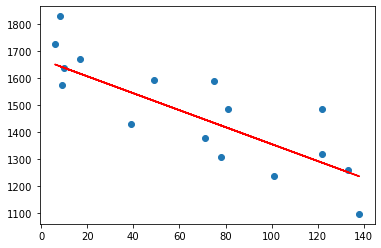

In [22]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [23]:
# Вывести график остатков
resid = y_pred - y_test
resid

,mortality
1,-52.870117
36,-74.327146
23,66.252044
17,118.043940
44,-76.358762
60,67.555296
59,-70.847406
41,115.347192
8,0.111774
34,-8.141453


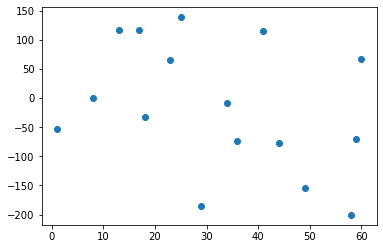

In [24]:
plt.scatter(resid.index, resid)

Остатки распределены хаотично - еще один признак правильно подобранной модели

In [25]:
import seaborn as sns

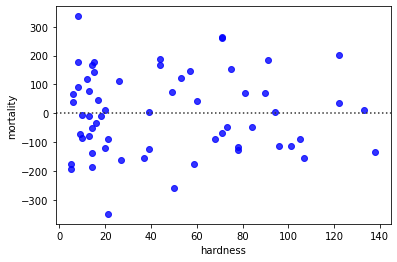

In [26]:
# Еще один график остатков через библиотеку seaborn для всех данных
sns.residplot(x='hardness', y='mortality', data=df, color="b")

### Задача 2.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

* Разделить данные на 2 группы
* Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [27]:
df_south = df[df.location=='South']
df_south.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
2,South,Birmingham,1466,5
7,South,Bournemouth,1299,78
9,South,Brighton,1359,84
10,South,Bristol,1392,73


In [28]:
df_north = df[df.location=='North']
df_north.head()

,location,town,mortality,hardness
1,North,Birkenhead,1668,17
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
5,North,Bolton,1558,10
6,North,Bootle,1807,15


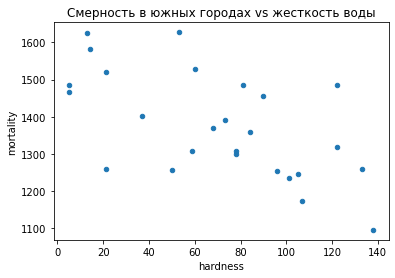

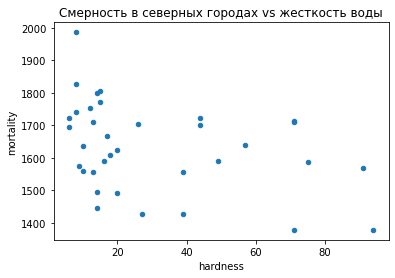

In [29]:
df_south.plot(kind='scatter', x='hardness', y='mortality', title = 'Смерность в южных городах vs жесткость воды')
df_north.plot(kind='scatter', x='hardness', y='mortality', title = 'Смерность в северных городах vs жесткость воды')

In [30]:
print('коэффициент корреляции Пирсона в южных городах')
df_south.corr()

коэффициент корреляции Пирсона в южных городах


,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [31]:
print('коэффициент корреляции Пирсона в северных городах')
df_north.corr()

коэффициент корреляции Пирсона в северных городах


,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [32]:
print('коэффициент корреляции Спирмена в южных городах')
df_south.corr(method='spearman')

коэффициент корреляции Спирмена в южных городах


,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [33]:
print('коэффициент корреляции Спирмена в северных городах')
df_north.corr(method='spearman')

коэффициент корреляции Спирмена в северных городах


,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


Коэффициенты корреляции для южных и северных городов в отдельности меньше, чем коэффициенты корреляции для годов вместе. Значит сила линейной взаимосвязи между смертностью и жесткостью воды при рассмотрении городов по отдельности меньше, чем сила при рассмотрении городов вместе. То есть зависимость сохраняется, но имеет меньшую силу.

## Построение линейной регресии
### Южные города

In [34]:
X = df_south[['hardness']]
y = df_south[['mortality']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
model = LinearRegression()
model.fit(X_train, y_train) 

LinearRegression()

коэффициент а  для прямой y=a*x+b:  -2.527713533575435
коэффициент b:  1543.8699342128266
коэффициент детерминации 0.17659579522823254


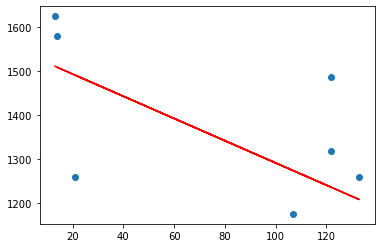

In [35]:
# коэффициенты а и b для прямой y=a*x+b
print('коэффициент а  для прямой y=a*x+b: ',model.coef_[0][0])
print('коэффициент b: ', model.intercept_[0])
y_pred = model.predict(X_test)
# коэффициент детерминации
print('коэффициент детерминации', model.score(X_test, y_test))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

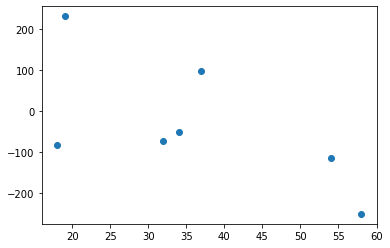

In [36]:
# Вывести график остатков
resid = y_pred - y_test
resid
plt.scatter(resid.index, resid)

### Северные города

In [37]:
X = df_north[['hardness']]
y = df_north[['mortality']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=50)
model = LinearRegression()
model.fit(X_train, y_train) 

LinearRegression()

коэффициент а  для прямой y=a*x+b:  -1.573877711749123
коэффициент b:  1676.276770244147
коэффициент детерминации 0.1825953672054048


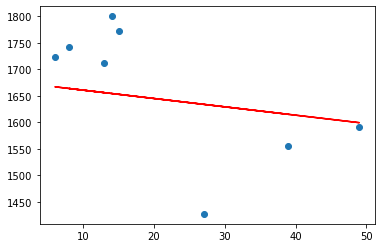

In [38]:
# коэффициенты а и b для прямой y=a*x+b
print('коэффициент а  для прямой y=a*x+b: ',model.coef_[0][0])
print('коэффициент b: ', model.intercept_[0])
y_pred = model.predict(X_test)
# коэффициент детерминации
print('коэффициент детерминации', model.score(X_test, y_test))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

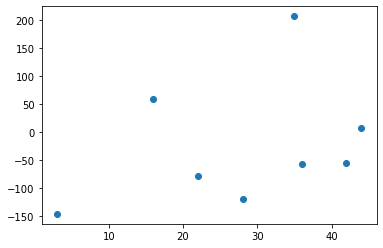

In [39]:
# Вывести график остатков
resid = y_pred - y_test
resid
plt.scatter(resid.index, resid)

## Вывод
Коэффициенты детерминации при рассмотрении южных и северных городов по отдельности очень низки, значит данная модель линейной регрессии плохо описывает данные, возможно из-за малого объема данных.